In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install the Kaggle API
!pip install -q kaggle

In [ ]:
# Make a directory named “.kaggle”
!mkdir -p ~/.kaggle

In [ ]:
# Copy the “kaggle.json” into this new directory
!cp /content/drive/MyDrive/Datasets/kaggle.json ~/.kaggle/

In [ ]:
# Allocate the required permission for this file
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d maxhorowitz/nflplaybyplay2009to2016

nflplaybyplay2009to2016.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q nflplaybyplay2009to2016.zip -d .

replace ./NFL Play by Play 2009-2016 (v3).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Preprocessing Structured Data

## Preparation

In [465]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [466]:
df['SideofField'].dtypes

dtype('O')

In [467]:
df['SideofField'].dtypes == 'O'

True

In [468]:
df = pd.read_csv('NFL Play by Play 2009-2016 (v3).csv')
df = df.iloc[:500, :]
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,30.0,30.0,0,0,0.0,NaN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,NaN,NaN,NaN,0,0,NaN,Kickoff,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,42.0,58.0,10,5,0.0,0.0,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Complete,Short,-3,8,0,left,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,47.0,53.0,5,2,0.0,0.0,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,NaN,NaN,NaN,0,0,NaN,Run,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,44.0,56.0,8,2,0.0,0.0,PIT,TEN,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Pass,B.Roethlisberger,00-0022924,1,Incomplete Pass,Deep,34,0,0,right,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,44.0,56.0,8,2,0.0,1.0,PIT,TEN,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,NaN,NaN,NaN,0,0,Clean,Punt,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,0.0,0.0,0.0,0.0,PIT,TEN,0,None,3,3,3,3,3,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2009-09-13,2009091307,24,3,NaN,00:00,0,900.0,42.0,NO,30.0,30.0,0,9,0.0,0.0,NaN,NaN,END QUARTER 3,1,0,0,0,NaN,NaN,NaN,0,0,NaN,Quarter End,NaN,None,0,NaN,NaN,0,0,0,NaN,0,...,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NO,DET,0,None,2,3,2,3,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2009
496,2009-09-13,2009091307,24,4,3.0,15:00,15,900.0,0.0,NO,31.0,69.0,1,18,0.0,1.0,NO,DET,(15:00) M.Bell right guard 

In [556]:
categorical_columns = []
numerical_columns = ['Date']
continous_columns = ['Date']

for i in df.columns:
  if (df[i].dtypes == 'O'):
    categorical_columns.append(i)
  elif (df[i].dtypes == 'int64'):
    numerical_columns.append(i)
  else :
    continous_columns.append(i)

In [557]:
df_categorical = df[categorical_columns]
df_numerical = df[numerical_columns]
df_continous = df[continous_columns]

In [471]:
info = [df_categorical.info(), df_numerical.info(), df_continous.info()]
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              500 non-null    object
 1   time              500 non-null    object
 2   SideofField       500 non-null    object
 3   posteam           470 non-null    object
 4   DefensiveTeam     470 non-null    object
 5   desc              500 non-null    object
 6   ExPointResult     14 non-null     object
 7   TwoPointConv      0 non-null      object
 8   DefTwoPoint       0 non-null      object
 9   PuntResult        30 non-null     object
 10  PlayType          500 non-null    object
 11  Passer            202 non-null    object
 12  Passer_ID         500 non-null    object
 13  PassOutcome       202 non-null    object
 14  PassLength        202 non-null    object
 15  PassLocation      202 non-null    object
 16  Interceptor       7 non-null      object
 17  Rusher          

[None, None, None]

In [472]:
for i in categorical_columns:
    print(df[i].value_counts())

2009-09-13    322
2009-09-10    178
Name: Date, dtype: int64
15:00    14
00:00    10
02:00     6
12:11     5
01:03     5
         ..
13:00     1
02:50     1
08:11     1
06:00     1
05:11     1
Name: time, Length: 333, dtype: int64
CLE    103
TEN     91
PIT     86
DET     79
NO      70
MIN     67
MID      4
Name: SideofField, dtype: int64
PIT    88
MIN    83
CLE    82
TEN    77
NO     73
DET    67
Name: posteam, dtype: int64
TEN    88
CLE    83
MIN    82
PIT    77
DET    73
NO     67
Name: DefensiveTeam, dtype: int64
Two-Minute Warning                                                                       5
J.Carney extra point is GOOD, Center-J.Kyle, Holder-M.Brunell.                           5
R.Longwell extra point is GOOD, Center-C.Loeffler, Holder-C.Kluwe.                       4
END QUARTER 3                                                                            3
END QUARTER 1                                                                            3
                       

## Handle missing value

In [473]:
df_continous.isnull().sum()

Date                     0
down                    78
TimeSecs                 0
PlayTimeDiff             0
yrdln                    0
yrdline100               0
GoalToGo                 0
FirstDown               40
FieldGoalDistance      487
PosTeamScore            31
DefTeamScore            31
ScoreDiff               30
AbsScoreDiff            31
No_Score_Prob            0
Opp_Field_Goal_Prob      0
Opp_Safety_Prob          0
Opp_Touchdown_Prob       0
Field_Goal_Prob          0
Safety_Prob              0
Touchdown_Prob           0
ExPoint_Prob             0
TwoPoint_Prob            0
ExpPts                   0
EPA                      0
airEPA                 307
yacEPA                 307
Home_WP_pre             29
Away_WP_pre             29
Home_WP_post            31
Away_WP_post            31
Win_Prob                29
WPA                      7
airWPA                 307
yacWPA                 307
dtype: int64

In [474]:
df_continous.shape

(500, 34)

In [475]:
df_categorical.isnull().sum()

Date                  0
time                  0
SideofField           0
posteam              30
DefensiveTeam        30
desc                  0
ExPointResult       486
TwoPointConv        500
DefTwoPoint         500
PuntResult          470
PlayType              0
Passer              298
Passer_ID             0
PassOutcome         298
PassLength          298
PassLocation        298
Interceptor         493
Rusher              354
Rusher_ID             0
RunLocation         354
RunGap              368
Receiver            306
Receiver_ID           0
ReturnResult        487
Returner            453
BlockingPlayer      500
Tackler1            187
Tackler2            423
FieldGoalResult     487
RecFumbTeam         496
RecFumbPlayer       496
ChalReplayResult    495
PenalizedTeam       467
PenaltyType         481
PenalizedPlayer     470
HomeTeam              0
AwayTeam              0
Timeout_Team          0
dtype: int64

In [476]:
df_categorical.shape

(500, 38)

1. Remove the rows or columns that contain missing value


---

metode ini kurang efektif karena apabila semua kolom atau baris dari data setidaknya memiliki 1 missing value maka akan menghapus keseluruhan data

In [477]:
# # remove by columns
# df_categorical_coldel = df_categorical.dropna(axis=1) # --> categorical dataset
# df_categorical_coldel.shape

In [478]:
# # remove by row
# df_continous_rowdel = df_continous_coldel.dropna(axis=0, how='all', inplace=True)
# df_continous_rowdel.shape

2. fill another values to replace missing value

In [479]:
df_continous_mean = df_continous.fillna(df_continous.mean())
df_continous_mean.isnull().sum()

Date                   0
down                   0
TimeSecs               0
PlayTimeDiff           0
yrdln                  0
yrdline100             0
GoalToGo               0
FirstDown              0
FieldGoalDistance      0
PosTeamScore           0
DefTeamScore           0
ScoreDiff              0
AbsScoreDiff           0
No_Score_Prob          0
Opp_Field_Goal_Prob    0
Opp_Safety_Prob        0
Opp_Touchdown_Prob     0
Field_Goal_Prob        0
Safety_Prob            0
Touchdown_Prob         0
ExPoint_Prob           0
TwoPoint_Prob          0
ExpPts                 0
EPA                    0
airEPA                 0
yacEPA                 0
Home_WP_pre            0
Away_WP_pre            0
Home_WP_post           0
Away_WP_post           0
Win_Prob               0
WPA                    0
airWPA                 0
yacWPA                 0
dtype: int64

In [480]:
df_continous_median = df_continous.fillna(df_continous.median())
df_continous_median.isnull().sum()

Date                   0
down                   0
TimeSecs               0
PlayTimeDiff           0
yrdln                  0
yrdline100             0
GoalToGo               0
FirstDown              0
FieldGoalDistance      0
PosTeamScore           0
DefTeamScore           0
ScoreDiff              0
AbsScoreDiff           0
No_Score_Prob          0
Opp_Field_Goal_Prob    0
Opp_Safety_Prob        0
Opp_Touchdown_Prob     0
Field_Goal_Prob        0
Safety_Prob            0
Touchdown_Prob         0
ExPoint_Prob           0
TwoPoint_Prob          0
ExpPts                 0
EPA                    0
airEPA                 0
yacEPA                 0
Home_WP_pre            0
Away_WP_pre            0
Home_WP_post           0
Away_WP_post           0
Win_Prob               0
WPA                    0
airWPA                 0
yacWPA                 0
dtype: int64

In [481]:
df_categorical.describe()

,Date,time,SideofField,posteam,DefensiveTeam,desc,ExPointResult,TwoPointConv,DefTwoPoint,PuntResult,PlayType,Passer,Passer_ID,PassOutcome,PassLength,PassLocation,Interceptor,Rusher,Rusher_ID,RunLocation,RunGap,Receiver,Receiver_ID,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,RecFumbTeam,RecFumbPlayer,ChalReplayResult,PenalizedTeam,PenaltyType,PenalizedPlayer,HomeTeam,AwayTeam,Timeout_Team
count,500,500,500,470,470,500,14,0,0,30,500,202,500,202,202,202,7,146,500,146,132,194,500,13,47,0,313,77,13,4,4,5,33,19,30,500,500,500
unique,2,333,7,6,6,482,1,0,0,1,13,7,8,2,2,3,7,22,24,3,3,42,45,3,12,0,112,53,3,4,4,2,6,7,26,3,3,7
top,2009-09-13,15:00,CLE,PIT,TEN,Two-Minute Warning,Made,NaN,NaN,Clean,Pass,B.Roethlisberger,None,Complete,Short,right,V.Fuller,A.Peterson,None,right,guard,J.Gage,None,Fair Catch,J.Cribbs,NaN,C.Finnegan,S.Tulloch,Good,MIN,S.Tulloch,Upheld,CLE,False Start,D.Stewart,PIT,TEN,None
freq,322,14,103,88,88,5,14,NaN,NaN,30,193,45,292,129,160,84,1,25,352,74,73,13,309,6,9,NaN,9,4,10,1,1,3,8,9,3,178,178,482


## Categorical Encoding

1. One-Hot-Encoder

In [482]:
ohe_df = pd.get_dummies(df_continous_mean, columns=['Date'])
print(ohe_df)

     down  TimeSecs  PlayTimeDiff  ...    yacWPA  Date_2009-09-10  Date_2009-09-13
0     2.0    3600.0           0.0  ... -0.000294                1                0
1     1.0    3593.0           7.0  ...  0.036899                1                0
2     2.0    3556.0          37.0  ... -0.000294                1                0
3     3.0    3515.0          41.0  ... -0.156239                1                0
4     4.0    3507.0           8.0  ... -0.000294                1                0
..    ...       ...           ...  ...       ...              ...              ...
495   2.0     900.0          42.0  ... -0.000294                0                1
496   3.0     900.0           0.0  ... -0.000294                0                1
497   1.0     866.0          34.0  ...  0.017142                0                1
498   1.0     824.0          42.0  ... -0.000294                0                1
499   2.0     788.0          36.0  ... -0.000294                0                1

[50

2. Label Encoding

In [483]:
df_continous_mean['Date'].value_counts()

2009-09-13    322
2009-09-10    178
Name: Date, dtype: int64

In [484]:
change_value = {'Date' : {'2009-09-10' : 1.0, '2009-09-13' : 2.0}}
le_df = df_continous_mean.replace(change_value, inplace=False)

In [485]:
print(le_df)

     Date  down  TimeSecs  PlayTimeDiff  ...  Win_Prob       WPA    airWPA    yacWPA
0     1.0   2.0    3600.0           0.0  ...  0.485675  0.060758  0.007027 -0.000294
1     1.0   1.0    3593.0           7.0  ...  0.546433  0.004655 -0.032244  0.036899
2     1.0   2.0    3556.0          37.0  ...  0.551088 -0.040295  0.007027 -0.000294
3     1.0   3.0    3515.0          41.0  ...  0.510793 -0.049576  0.106663 -0.156239
4     1.0   4.0    3507.0           8.0  ...  0.461217  0.097712  0.007027 -0.000294
..    ...   ...       ...           ...  ...       ...       ...       ...       ...
495   2.0   2.0     900.0          42.0  ...  0.500310  0.000000  0.007027 -0.000294
496   2.0   3.0     900.0           0.0  ...  0.892454  0.014894  0.007027 -0.000294
497   2.0   1.0     866.0          34.0  ...  0.907349  0.014162 -0.002980  0.017142
498   2.0   1.0     824.0          42.0  ...  0.921511  0.003549  0.007027 -0.000294
499   2.0   2.0     788.0          36.0  ...  0.925060  0.008639 

## Normalization



---
Normalisasi pangkalan data ialah proses penyusunan pangkalan data relasional sesuai dengan rangkaian apa yang disebut bentuk normal untuk mengurangi redundansi data dan meningkatkan integritas data. Pertama diusulkan oleh Edgar F. Codd sebagai bagian model relasional miliknya

---

normalisasi dibutuhkan apabila setiap atribut/variabel memiliki range nilai tertentu yang tidak sama untuk setiap feature.
ini bertujuan untuk menyeragamkan data agar saat diolah, datanya tidak terlalu jauh range nya


perparation

In [486]:
# separate 'class' from the dataframe

In [487]:
X = le_df.iloc[:, 1:]
y = le_df.iloc[:, 0]

In [488]:
X

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,2.0,3600.0,0.0,30.0,30.0,0.0,0.284783,33.615385,0.000000,0.000000,0.000000,0.000000,0.001506,0.179749,0.006639,0.281138,0.213700,0.003592,0.313676,0.0,0.0,0.323526,2.014474,0.462382,-0.310331,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.007027,-0.000294
1,1.0,3593.0,7.0,42.0,58.0,0.0,0.000000,33.615385,0.000000,0.000000,0.000000,0.000000,0.000969,0.108505,0.001061,0.169117,0.293700,0.003638,0.423011,0.0,0.0,2.338000,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899
2,2.0,3556.0,37.0,47.0,53.0,0.0,0.000000,33.615385,0.000000,0.000000,0.000000,0.000000,0.001057,0.105106,0.000981,0.162747,0.304805,0.003826,0.421478,0.0,0.0,2.415907,-1.402760,0.462382,-0.310331,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.007027,-0.000294
3,3.0,3515.0,41.0,44.0,56.0,0.0,0.000000,33.615385,0.000000,0.000000,0.000000,0.000000,0.001434,0.149088,0.001944,0.234801,0.289336,0.004776,0.318621,0.0,0.0,1.013147,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239
4,4.0,3507.0,8.0,44.0,56.0,0.0,1.000000,33.615385,0.000000,0.000000,0.000000,0.000000,0.001861,0.213480,0.003279,0.322262,0.244603,0.006404,0.208111,0.0,0.0,-0.699436,2.097796,0.462382,-0.310331,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.007027,-0.000294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.0,900.0,42.0,30.0,30.0,0.0,0.000000,33.615385,9.507463,11.119403,-1.576596,6.264392,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.462382,-0.310331,0.531692,0.470431,0.530927,0.471206,0.500310,0.000000,0.007027,-0.000294
496,3.0,900.0,0.0,31.0,69.0,0.0,1.000000,33.615385,38.000000,26.000000,12.000000,12.000000,0.044656,0.150777,0.003302,0.217673,0.178784,0.002826,0.401983,0.0,0.0,1.373233,0.944838,0.462382,-0.310331,0.892454,0.107546,0.907349,0.092651,0.892454,0.014894,0.007027,-0.000294
497,1.0,866.0,34.0,40.0,60.0,0.0,1.000000,33.615385,38.000000,26.000000,12.000000,12.000000,0.040246,0.104794,0.001140,0.157744,0.279227,0.003336,0.413513,0.0,0.0,2.318070,0.961736,-0.236856,1.198592,0.907349,0.092651,0.921511,0.078489,0.907349,0.014162,-0.002980,0.017142
498,1.0,824.0,42.0,46.0,46.0,0.0,0.000000,33.615385,38.000000,26.000000,12.000000,12.000000,0.032962,0.070788,0.000330,0.106167,0.319152,0.003131,0.467469,0.0,0.0,3.279806,0.157698,0.462382,-0.310331,0.921511,0.078489,0.925060,0.074940,0.921511,0.003549,0.007027,-0.000294


In [489]:
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
495    2.0
496    2.0
497    2.0
498    2.0
499    2.0
Name: Date, Length: 500, dtype: float64

In [490]:
X_column_name = list(X.columns)

### 1. Z-score


---

normalisasi berdasarkan Z (Standar Deviasi)

In [491]:
from sklearn.preprocessing import StandardScaler

In [492]:
std_scaler = StandardScaler()
le_df_ss = pd.DataFrame(std_scaler.fit_transform(le_df), columns=le_df.columns)
le_df_ss

,Date,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,-1.344987,0.000000,1.774493,-1.245536,0.196108,-0.671320,-0.234206,1.282362e-16,-1.110306e-14,-1.097751e+00,-1.173506,1.790459e-01,-0.959623,-0.635855,1.192169,1.132070,1.299875,-0.169875,0.709321,0.073360,-0.169725,0.0,-0.712152,1.423567,0.000000,0.000000,-1.842075e-01,1.755363e-01,6.179995e-02,-7.023122e-02,-0.058146,1.421042,9.003597e-17,1.649966e-17
1,-1.344987,-1.080844,1.767717,-0.822049,1.097062,0.400343,-0.234206,-6.578756e-01,-1.110306e-14,-1.097751e+00,-1.173506,1.790459e-01,-0.959623,-0.638448,0.216180,-0.408529,0.296500,0.304148,0.740969,0.676408,-0.169725,0.0,0.388218,0.066094,-1.654747,1.192456,5.900668e-02,-6.743946e-02,8.035235e-02,-8.876605e-02,0.183246,0.075053,-1.019116e+00,8.085812e-01
2,-1.344987,0.000000,1.731906,0.992895,1.472459,0.208974,-0.234206,-6.578756e-01,-1.110306e-14,-1.097751e+00,-1.173506,1.790459e-01,-0.959623,-0.638020,0.169614,-0.430597,0.239444,0.369947,0.872972,0.667953,-0.169725,0.0,0.430773,-0.971807,0.000000,0.000000,7.764059e-02,-8.605511e-02,-8.024214e-02,7.167632e-02,0.201740,-1.003355,9.003597e-17,1.649966e-17
3,-1.344987,1.080844,1.692223,1.234888,1.247221,0.323795,-0.234206,-6.578756e-01,-1.110306e-14,-1.097751e+00,-1.173506,1.790459e-01,-0.959623,-0.636204,0.772140,-0.164598,0.884834,0.278291,1.538435,0.100636,-0.169725,0.0,-0.335459,-1.188984,3.088246,-3.865470,-8.365950e-02,7.508687e-02,-2.778270e-01,2.690740e-01,0.041649,-1.226025,2.585661e+00,-3.390298e+00
4,-1.344987,2.161689,1.684479,-0.761550,1.247221,0.323795,-0.234206,1.652222e+00,-1.110306e-14,-1.097751e+00,-1.173506,1.790459e-01,-0.959623,-0.634144,1.654258,0.204015,1.668227,0.013237,2.678095,-0.508888,-0.169725,0.0,-1.270926,1.481973,0.000000,0.000000,-2.821125e-01,2.733454e-01,1.116050e-01,-1.199890e-01,-0.155317,2.307632,9.003597e-17,1.649966e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.743502,0.000000,-0.838790,1.295386,0.196108,-0.671320,-0.234206,-6.578756e-01,-1.110306e-14,-2.051017e-16,0.000000,-2.521647e-17,0.000000,-0.643117,-1.270273,-0.701467,-1.218283,-1.436114,-1.806052,-1.656736,-0.169725,0.0,-0.888872,0.011484,0.000000,0.000000,-4.444231e-16,2.219937e-16,-4.424790e-16,6.630898e-16,0.000000,-0.036626,9.003597e-17,1.649966e-17
496,0.743502,1.080844,-0.838790,-1.245536,0.271187,0.821353,-0.234206,1.652222e+00,-1.110306e-14,3.289806e+00,1.570450,1.541825e+00,0.878620,-0.427828,0.795272,0.210432,0.731424,-0.376766,0.172509,0.560423,-0.169725,0.0,-0.138769,0.673785,0.000000,0.000000,1.444134e+00,-1.451209e+00,1.500229e+00,-1.507297e+00,1.557991,0.320708,9.003597e-17,1.649966e-17
497,0.743502,-1.080844,-0.871698,0.811401,0.946903,0.476890,-0.234206,1.652222e+00,-1.110306e-14,3.289806e+00,1.570450,1.541825e+00,0.878620,-0.449089,0.165334,-0.386506,0.194637,0.218392,0.529653,0.624019,-0.169725,0.0,0.377332,0.685630,-0.755978,1.235455,1.503755e+00,-1.510772e+00,1.556672e+00,-1.563687e+00,1.617166,0.303147,-2.596824e-01,3.790623e-01
498,0.743502,-1.080844,-0.912349,1.295386,1.397380,-0.058941,-0.234206,-6.578756e-01,-1.110306e-14,3.289806e+00,1.570450,1.541825e+00,0.878620,-0.484203,-0.300530,-0.610210,-0.267338,0.454961,0.386302,0.921617,-0.169725,0.0,0.902662,0.122025,0.000000,0.000000,1.560447e+00,-1.567408e+00,1.570818e+00,-1.577820e+00,1.673433,0.048528,9.003597e-17,1.649966e-17


### 2. Min-Max 


---

samakan nilai minimun dengan maximum dari setiap nilai yang ada pada seluruh atribut


In [493]:
# Before
print('Min: ', X.min(axis=0))
print('Max: ', X.max(axis=0))

Min:  down                     1.000000
TimeSecs              -266.000000
PlayTimeDiff             0.000000
yrdln                    1.000000
yrdline100               1.000000
GoalToGo                 0.000000
FirstDown                0.000000
FieldGoalDistance       20.000000
PosTeamScore             0.000000
DefTeamScore             0.000000
ScoreDiff              -22.000000
AbsScoreDiff             0.000000
No_Score_Prob            0.000000
Opp_Field_Goal_Prob      0.000000
Opp_Safety_Prob          0.000000
Opp_Touchdown_Prob       0.000000
Field_Goal_Prob          0.000000
Safety_Prob              0.000000
Touchdown_Prob           0.000000
ExPoint_Prob             0.000000
TwoPoint_Prob            0.000000
ExpPts                  -3.424585
EPA                    -11.097988
airEPA                  -5.607747
yacEPA                  -7.924140
Home_WP_pre              0.000000
Away_WP_pre              0.017602
Home_WP_post             0.000000
Away_WP_post             0.017602
Win_Prob

In [494]:
 from sklearn.preprocessing import MinMaxScaler

In [495]:
mm_scaler = MinMaxScaler()
scaled = mm_scaler.fit_transform(X)

In [496]:
# After
print('Min: ', scaled.min(axis=0))
print('Max: ', scaled.max(axis=0))

Min:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Max:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [497]:
# update new min/mac value to data
le_df_mms = pd.DataFrame(data=scaled, columns=X_column_name)

In [498]:
le_df_mms.describe()

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.333333,0.525769,0.289972,0.538531,0.479794,0.052000,0.284783,0.504274,0.250196,0.292616,0.464168,0.284745,0.133397,0.272264,0.097982,0.281369,0.244329,0.402764,0.329016,0.028000,0.0,0.509001,0.652711,0.512546,0.522249,0.531692,0.460942,0.530927,0.461731,0.500839,0.704521,0.709808,0.454657
std,0.308710,0.267516,0.233042,0.272093,0.269627,0.222249,0.433316,0.047451,0.228146,0.249602,0.200326,0.297023,0.207630,0.214549,0.139821,0.231186,0.170302,0.223231,0.198791,0.165138,0.0,0.184639,0.084111,0.078178,0.083859,0.250062,0.254793,0.251161,0.255904,0.252217,0.076306,0.050728,0.047111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.318676,0.070423,0.346939,0.298969,0.000000,0.000000,0.504274,0.078947,0.078947,0.409091,0.000000,0.002937,0.099978,0.004468,0.075260,0.142971,0.265535,0.201671,0.000000,0.0,0.377641,0.619600,0.512546,0.522249,0.416841,0.267504,0.415848,0.267504,0.382671,0.674325,0.709808,0.454657
50%,0.333333,0.545913,0.246479,0.591837,0.463918,0.000000,0.000000,0.504274,0.250196,0.263158,0.500000,0.181818,0.026692,0.224745,0.036413,0.237708,0.216728,0.469044,0.339243,0.000000,0.0,0.466951,0.653676,0.512546,0.522249,0.531692,0.460942,0.530927,0.461731,0.519020,0.701729,0.709808,0.454657
75%,0.666667,0.746185,0.521127,0.739796,0.711340,0.000000,1.000000,0.504274,0.315789,0.368421,0.500000,0.500000,0.155336,0.432096,0.142689,0.455156,0.329963,0.550278,0.467622,0.000000,0.0,0.653489,0.687747,0.512546,0.542224,0.724620,0.576701,0.724620,0.577677,0.624460,0.732467,0.709808,0.454958
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [499]:
le_df_mms

,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,0.333333,1.000000,0.000000,0.591837,0.298969,0.0,0.284783,0.504274,0.000000,0.000000,0.500000,0.000000,0.001506,0.527787,0.256111,0.581581,0.215428,0.560948,0.343584,0.0,0.0,0.377641,0.772329,0.512546,0.522249,0.485675,0.505623,0.546433,0.443776,0.486188,0.812846,0.709808,0.454657
1,0.000000,0.998189,0.098592,0.836735,0.587629,0.0,0.000000,0.504274,0.000000,0.000000,0.500000,0.000000,0.000969,0.318599,0.040918,0.349847,0.296074,0.568006,0.463345,0.0,0.0,0.580609,0.658265,0.383310,0.622147,0.546433,0.443776,0.551088,0.439038,0.547010,0.710242,0.658162,0.492712
2,0.333333,0.988619,0.521127,0.938776,0.536082,0.0,0.000000,0.504274,0.000000,0.000000,0.500000,0.000000,0.001057,0.308618,0.037835,0.336669,0.307269,0.597443,0.461666,0.0,0.0,0.588459,0.571053,0.512546,0.522249,0.551088,0.439038,0.510793,0.480055,0.551670,0.628036,0.709808,0.454657
3,0.666667,0.978013,0.577465,0.877551,0.567010,0.0,0.000000,0.504274,0.000000,0.000000,0.500000,0.000000,0.001434,0.437760,0.074990,0.485726,0.291675,0.745847,0.349001,0.0,0.0,0.447124,0.552804,0.753738,0.198418,0.510793,0.480055,0.461217,0.530519,0.511333,0.611062,0.840843,0.295098
4,1.000000,0.975944,0.112676,0.877551,0.567010,0.0,1.000000,0.504274,0.000000,0.000000,0.500000,0.000000,0.001861,0.626829,0.126479,0.666654,0.246581,1.000000,0.227954,0.0,0.0,0.274572,0.777237,0.512546,0.522249,0.461217,0.530519,0.558929,0.431056,0.461705,0.880431,0.709808,0.454657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.333333,0.301604,0.591549,0.591837,0.298969,0.0,0.000000,0.504274,0.250196,0.292616,0.464168,0.284745,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.345044,0.653676,0.512546,0.522249,0.531692,0.460942,0.530927,0.461731,0.500839,0.701729,0.709808,0.454657
496,0.666667,0.301604,0.000000,0.612245,0.701031,0.0,1.000000,0.504274,1.000000,0.684211,0.772727,0.545455,0.044656,0.442718,0.127375,0.450295,0.180229,0.441235,0.440311,0.0,0.0,0.483404,0.709327,0.512546,0.522249,0.892454,0.091555,0.907349,0.076394,0.893398,0.728969,0.709808,0.454657
497,0.000000,0.292809,0.478873,0.795918,0.608247,0.0,1.000000,0.504274,1.000000,0.684211,0.772727,0.545455,0.040246,0.307701,0.043994,0.326321,0.281484,0.520881,0.452941,0.0,0.0,0.578601,0.710322,0.453504,0.625750,0.907349,0.076394,0.921511,0.061978,0.908308,0.727630,0.696648,0.472497
498,0.000000,0.281945,0.591549,0.918367,0.463918,0.0,0.000000,0.504274,1.000000,0.684211,0.772727,0.545455,0.032962,0.207850,0.012747,0.219625,0.321732,0.488912,0.512042,0.0,0.0,0.675501,0.662964,0.512546,0.522249,0.921511,0.061978,0.925060,0.058365,0.922485,0.708220,0.709808,0.454657


## Outliers

---

Dalam ilmu statistika, sebuah pencilan adalah titik data yang terpaut jauh dari titik data lainnya. Pencilan kemungkinan dapat berasal dari variabilitas pengukuran atau galat percobaan. Pencilan akibat galat seringkali diabaikan. Pencilan dapat mengakibatkan masalah serius dalam analisis statistik

### Detect and Visualize

1. Using Boxplot

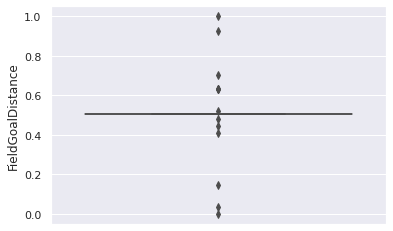

In [500]:
sns.boxplot(y=le_df_mms['FieldGoalDistance'])

2. Using Scatterplot

In [501]:
le_df_mms = pd.concat([y, le_df_mms], axis=1)
le_df_mms.head()

,Date,down,TimeSecs,PlayTimeDiff,yrdln,yrdline100,GoalToGo,FirstDown,FieldGoalDistance,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
0,1.0,0.333333,1.000000,0.000000,0.591837,0.298969,0.0,0.284783,0.504274,0.0,0.0,0.5,0.0,0.001506,0.527787,0.256111,0.581581,0.215428,0.560948,0.343584,0.0,0.0,0.377641,0.772329,0.512546,0.522249,0.485675,0.505623,0.546433,0.443776,0.486188,0.812846,0.709808,0.454657
1,1.0,0.000000,0.998189,0.098592,0.836735,0.587629,0.0,0.000000,0.504274,0.0,0.0,0.5,0.0,0.000969,0.318599,0.040918,0.349847,0.296074,0.568006,0.463345,0.0,0.0,0.580609,0.658265,0.383310,0.622147,0.546433,0.443776,0.551088,0.439038,0.547010,0.710242,0.658162,0.492712
2,1.0,0.333333,0.988619,0.521127,0.938776,0.536082,0.0,0.000000,0.504274,0.0,0.0,0.5,0.0,0.001057,0.308618,0.037835,0.336669,0.307269,0.597443,0.461666,0.0,0.0,0.588459,0.571053,0.512546,0.522249,0.551088,0.439038,0.510793,0.480055,0.551670,0.628036,0.709808,0.454657
3,1.0,0.666667,0.978013,0.577465,0.877551,0.567010,0.0,0.000000,0.504274,0.0,0.0,0.5,0.0,0.001434,0.437760,0.074990,0.485726,0.291675,0.745847,0.349001,0.0,0.0,0.447124,0.552804,0.753738,0.198418,0.510793,0.480055,0.461217,0.530519,0.511333,0.611062,0.840843,0.295098
4,1.0,1.000000,0.975944,0.112676,0.877551,0.567010,0.0,1.000000,0.504274,0.0,0.0,0.5,0.0,0.001861,0.626829,0.126479,0.666654,0.246581,1.000000,0.227954,0.0,0.0,0.274572,0.777237,0.512546,0.522249,0.461217,0.530519,0.558929,0.431056,0.461705,0.880431,0.709808,0.454657


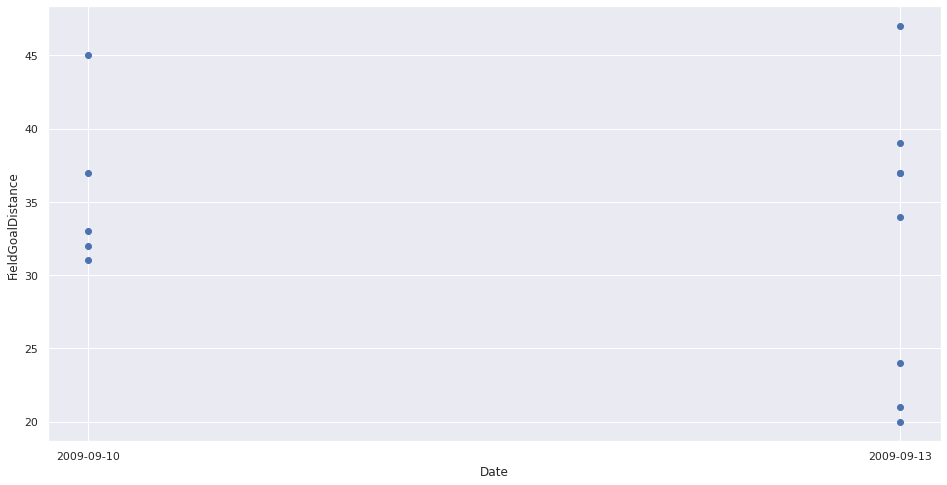

In [502]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Date'], df['FieldGoalDistance'])
ax.set_xlabel('Date')
ax.set_ylabel('FieldGoalDistance')
plt.show()

### Handle Outliers

1. Remove by Z-score

In [503]:
from scipy import stats

In [504]:
le_df_mms.shape

(500, 34)

In [505]:
z = np.abs(stats.zscore(le_df_mms))
print(z)

[[1.34498653e+00 1.79996726e-16 1.77449256e+00 ... 1.42104200e+00
  2.19076481e-15 1.17949623e-15]
 [1.34498653e+00 1.08084425e+00 1.76771738e+00 ... 7.50533635e-02
  1.01911613e+00 8.08581220e-01]
 [1.34498653e+00 1.79996726e-16 1.73190573e+00 ... 1.00335464e+00
  2.19076481e-15 1.17949623e-15]
 ...
 [7.43501870e-01 1.08084425e+00 8.71698216e-01 ... 3.03146584e-01
  2.59682357e-01 3.79062262e-01]
 [7.43501870e-01 1.08084425e+00 9.12349281e-01 ... 4.85276951e-02
  2.19076481e-15 1.17949623e-15]
 [7.43501870e-01 1.79996726e-16 9.47193051e-01 ... 1.70644623e-01
  2.19076481e-15 1.17949623e-15]]


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


In [506]:
threshold = 3
print(np.where(z > 3))

(array([  3,   3,   3,   5,   6,   7,   8,   8,   8,  20,  31,  31,  34,
        42,  64,  64,  64,  64,  65,  72,  72,  72,  72,  73,  78,  79,
        89,  89,  89,  89,  96,  96,  96,  96, 101, 102, 103, 104, 104,
       104, 112, 118, 118, 131, 131, 146, 151, 151, 153, 158, 158, 159,
       161, 162, 164, 168, 168, 169, 171, 172, 172, 173, 173, 174, 174,
       175, 175, 177, 186, 196, 205, 206, 207, 207, 208, 208, 208, 217,
       218, 219, 227, 228, 229, 230, 230, 230, 246, 246, 265, 266, 267,
       268, 272, 286, 297, 297, 308, 314, 321, 322, 329, 345, 346, 348,
       355, 356, 364, 365, 375, 375, 384, 395, 396, 404, 404, 404, 404,
       416, 417, 419, 420, 433, 434, 444, 444, 445, 445, 447, 447, 450,
       451, 456, 456, 457, 458, 459, 460, 460, 461, 461, 462, 474, 474,
       478, 478, 479, 480, 481, 482, 482, 482, 484, 484, 485, 485, 490,
       491, 491, 492, 493, 494, 496, 497, 498, 499]), array([24, 25, 33, 15, 15, 15, 14, 15, 16, 17, 25, 33, 25, 15, 24, 25, 32,
      

In [507]:
print(z[1][0])

1.3449865293172802


In [508]:
le_df_mms.shape

(500, 34)

In [509]:
le_df_mms_clearzs = le_df_mms[(z < 6).all(axis=1)]
le_df_mms_clearzs.shape

(0, 34)

2. Remove by IQR

In [510]:

Q1 = le_df_mms.quantile(0.25)
Q3 = le_df_mms.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date                   1.000000
down                   0.666667
TimeSecs               0.427509
PlayTimeDiff           0.450704
yrdln                  0.392857
yrdline100             0.412371
GoalToGo               0.000000
FirstDown              1.000000
FieldGoalDistance      0.000000
PosTeamScore           0.236842
DefTeamScore           0.289474
ScoreDiff              0.090909
AbsScoreDiff           0.500000
No_Score_Prob          0.152399
Opp_Field_Goal_Prob    0.332118
Opp_Safety_Prob        0.138221
Opp_Touchdown_Prob     0.379896
Field_Goal_Prob        0.186993
Safety_Prob            0.284743
Touchdown_Prob         0.265951
ExPoint_Prob           0.000000
TwoPoint_Prob          0.000000
ExpPts                 0.275848
EPA                    0.068147
airEPA                 0.000000
yacEPA                 0.019975
Home_WP_pre            0.307779
Away_WP_pre            0.309197
Home_WP_post           0.308772
Away_WP_post           0.310173
Win_Prob               0.241789
WPA     

In [511]:
le_df_mms.shape

(500, 34)

In [512]:
le_df_mms_cleariqr = le_df_mms[~((le_df_mms < (Q1 - 1.5 * IQR)) | (le_df_mms > (Q3 + 1.5 * IQR))).any(axis=1)]
le_df_mms_cleariqr.shape

(138, 34)

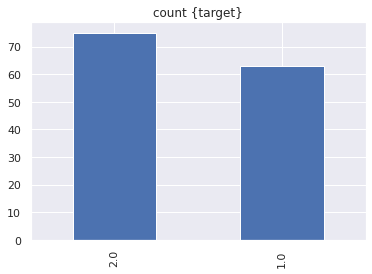

In [513]:
le_df_mms_cleariqr['Date'].value_counts().plot(kind='bar', title='count {target}')


berdasarkan grafik diatas data dari kedua kelas memiliki perbedaan yang cukup tinggi sehingga kita harus memperbaikinya. inilah yang dinamankan resampling


## Resampling

---

Dalam statistik, resampling adalah salah satu dari berbagai metode untuk melakukan salah satu dari yang berikut: Memperkirakan ketepatan statistik sampel dengan menggunakan himpunan bagian dari data yang tersedia atau menggambar secara acak dengan penggantian dari satu set titik data

Preparation

In [514]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = le_df_mms_cleariqr.iloc[:, 1:]
y = le_df_mms_cleariqr.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy: %.2f%%' % (accuracy * 100.0))

accuracy: 78.57%


In [515]:
le_df_mms_cleariqr['Date'].unique()

array([1., 2.])

Confusion Matrix: 
 [[13  2]
 [ 4  9]]


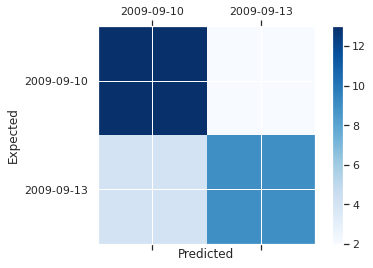

In [516]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion Matrix: \n', conf_mat)

labels = ['2009-09-10', '2009-09-13']

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [517]:

from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter


In [518]:
print("Before : ",Counter(y))

Before :  Counter({2.0: 75, 1.0: 63})


### 1. Random Oversampling

---

Random oversampling involves randomly selecting examples from the minority class, with replacement, and adding them to the training dataset. Random undersampling involves randomly selecting examples from the majority class and deleting them from the training dataset

In [519]:

# instantiating the random oversample
ros = RandomOverSampler()

# resampling X, y
X_ros, y_ros = ros.fit_resample(X, y)

# new class distribution
print("After : ",Counter(y_ros))

After :  Counter({1.0: 75, 2.0: 75})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 2. SMOTE (Synthetic Minority Oversampling Technique)

---

Synthetic Minority Oversampling Technique, or SMOTE for short is This is a type of data augmentation for the minority class. is adding a new Synthetic data to minority class,

In [520]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

print(Counter(y_sm))

Counter({1.0: 75, 2.0: 75})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 3. SMOTE Tomek

---



In [521]:

from imblearn.combine import SMOTETomek

smt = smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_resample(X, y)
print(Counter(y_smt))

Counter({1.0: 67, 2.0: 67})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 4. Random Under Sampling

---

randomly resampling an imbalanced dataset are to delete examples from the majority class

In [522]:

# instantiating the random undersampler
rus = RandomUnderSampler()

# resampling X, y
X_rus, y_rus = rus.fit_resample(X, y)

# new class distribution
print(Counter(y_rus))

Counter({1.0: 63, 2.0: 63})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 5. Tomek Links

---

Tomek Links refers to a method for identifying pairs of nearest neighbors in a dataset that have different classes. Removing one or both of the examples in these pairs (such as the examples in the majority class) has the effect of making the decision boundary in the training dataset less noisy or ambiguous.

In [523]:

from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X, y)

print(Counter(y_tl))

Counter({2.0: 65, 1.0: 63})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


### 6. cluster centroid

---

Method that under samples the majority class by replacing a cluster of majority samples by the cluster centroid of a KMeans algorithm. This algorithm keeps N majority samples by fitting the KMeans algorithm with N cluster to the majority class and using the coordinates of the N cluster centroids as the new majority samples.


In [524]:

from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids()
x_cc, y_cc = cc.fit_resample(X, y)

print(Counter(y_cc))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({1.0: 63, 2.0: 63})


# Handle Categoric Datasets

In [540]:
df_categorical.head(3)

,Date,time,SideofField,posteam,DefensiveTeam,desc,ExPointResult,TwoPointConv,DefTwoPoint,PuntResult,PlayType,Passer,Passer_ID,PassOutcome,PassLength,PassLocation,Interceptor,Rusher,Rusher_ID,RunLocation,RunGap,Receiver,Receiver_ID,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,RecFumbTeam,RecFumbPlayer,ChalReplayResult,PenalizedTeam,PenaltyType,PenalizedPlayer,HomeTeam,AwayTeam,Timeout_Team
0,2009-09-10,15:00,TEN,PIT,TEN,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,NaN,NaN,NaN,NaN,Kickoff,NaN,None,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,None,NaN,S.Logan,NaN,M.Griffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIT,TEN,None
1,2009-09-10,14:53,PIT,PIT,TEN,(14:53) B.Roethlisberger pass short left to H....,NaN,NaN,NaN,NaN,Pass,B.Roethlisberger,00-0022924,Complete,Short,left,NaN,NaN,None,NaN,NaN,H.Ward,00-0017162,NaN,NaN,NaN,C.Hope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIT,TEN,None
2,2009-09-10,14:16,PIT,PIT,TEN,(14:16) W.Parker right end to PIT 44 for -3 ya...,NaN,NaN,NaN,NaN,Run,NaN,None,NaN,NaN,NaN,NaN,W.Parker,00-0022250,right,end,NaN,None,NaN,NaN,NaN,S.Tulloch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIT,TEN,None


## Mising Value

In [532]:
df_categorical.shape, df_continous.shape

((500, 38), (500, 34))

Delete missing value

In [526]:
# delete by coloumns
df_categorical_coldel = df_categorical.dropna(axis=1)
df_categorical_coldel.shape

(500, 11)

In [538]:
# delete by row
df_categorical_rowdel = df_categorical.dropna(axis=0)
df_categorical_rowdel

,Date,time,SideofField,posteam,DefensiveTeam,desc,ExPointResult,TwoPointConv,DefTwoPoint,PuntResult,PlayType,Passer,Passer_ID,PassOutcome,PassLength,PassLocation,Interceptor,Rusher,Rusher_ID,RunLocation,RunGap,Receiver,Receiver_ID,ReturnResult,Returner,BlockingPlayer,Tackler1,Tackler2,FieldGoalResult,RecFumbTeam,RecFumbPlayer,ChalReplayResult,PenalizedTeam,PenaltyType,PenalizedPlayer,HomeTeam,AwayTeam,Timeout_Team


fill mising value with most frequent value

In [580]:
# df_categorical_fill = df_categorical

# for i in df_categorical.columns:
#   df_categorical_fill[i].fillna(df_categorical[i].mode().iloc[0])

# df_categorical_fill.head()

## 